## Module 2 Final Project Submission

- Student name: Stephan Osterburg
- Student pace: Full Time
- Instructor name: Rafael Carrasco

---

- [Northwind Database](#section_id1)
- [Approach](#section_id2)
- [General Code](#section_id21)
- [Does discount amount have a statistically significant effect on the quantity of products ordered?](#section_id3)
    - [Research](#section_id31)
    - [Hypothesis](#section_id32)
    - [Test](#section_id33)
    - [Conclusion](#section_id34)
- [Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?](#section_id4)
    - [Research](#section_id41)
    - [Hypothesis](#section_id42)
    - [Test](#section_id43)
    - [Conclusion](#section_id44)
- [Do customer spend more money on imported or domestic goods?](#section_id5)
    - [Research](#section_id51)
    - [Hypothesis](#section_id52)
    - [Test](#section_id53)
    - [Conclusion](#section_id54)
- [Does gender matter in order volume?](#section_id6)
    - [Research](#section_id61)
    - [Hypothesis](#section_id62)
    - [Test](#section_id63)
    - [Conclusion](#section_id64)

---
<a id='section_id1'></a>

## Northwind Database

The given Norhtface database is the basis for many tutorials Microsoft uses to introduce students to SQL and Microsoft Access. It is based on a fictitious company named Northwind Traders, which imports and exports specialty foods around the world.

The database contains some sample tables, queries, reports, and other database features. It incorporates sales transactions between the company and its customers, along with purchasing details between the company and its vendors.

<img src="northwind_sample_database_erd.png">

---
<a id='section_id2'></a>

## Approach

<img src="the-scientific-method.png">

Based on the given schema the following steps will be the guide for all questions asked.

A. Reseach
    * Google and see if there are answers to our question
    * Explore the given data
    * If needed, create custom dataframe

B. Hypothesis
    * Formulate a Null Hypothesis and a Alternatove Hypothesis
    * Define Alpha and Beta
    
C. Test Hypothesis
    * Gather data 
    * Define a well-structured experiment
    * Calculate p-value and effect size
    
D. Draw Conclusion
    * Evaluate your results
    * Reject or fail to reject your null hypothesis
    

---
<a id='section_id21'></a>

## General Code

#### Import necessary librararies

In [1]:
import numpy as np
import pandas as pd
import sqlalchemy

from sqlalchemy import create_engine
from sqlalchemy import inspect

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# import local functions
#
# import functions as f

In [3]:
# you can check out the the documentation for the rest of the autoreaload modes
# by apending a question mark to %autoreload, like this:
# %autoreload?
#
%load_ext autoreload
%autoreload 2

In [4]:
# don't print matching warnings
import warnings
warnings.filterwarnings('ignore') 

#### Load Northwind_small.sqlite

In [5]:
# connect database
engine = create_engine('sqlite:///Northwind_small.sqlite')

# create inspector object
inspector = inspect(engine)

#### Helper function to print column names of a given table and it's datatypes

In [6]:
def get_columns_info(table_name):
    """
    Print column names of a given table and it's datatypes

    :table_name: name of a table in the inspected database
    :return: 
    """
    
    cols_list = inspector.get_columns(table_name)
    
    print("Table Name: {}".format(table_name))
    print("")
    
    for col in cols_list:
        print("Name: {} \t Type: {}".format(col['name'], col['type']))

---
<a id='section_id3'></a>

## 1. Question

_Does discount amount have a statistically significant effect on the quantity of products ordered?_

<a id='section_id31'></a>

###  1-A. Research

In [7]:
# print table names
print(inspector.get_table_names())

['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [8]:
get_columns_info('OrderDetail')

Table Name: OrderDetail

Name: Id 	 Type: VARCHAR(8000)
Name: OrderId 	 Type: INTEGER
Name: ProductId 	 Type: INTEGER
Name: UnitPrice 	 Type: DECIMAL
Name: Quantity 	 Type: INTEGER
Name: Discount 	 Type: FLOAT


In [9]:
Q1_df = pd.read_sql_query('''SELECT * FROM OrderDetail;''', engine)

In [10]:
Q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB


In [11]:
Q1_df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [12]:
Q1_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [13]:
Q1_df.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

Lets drop the following discount values: 0.03, 0.02, 0.01, 0.04, 0.06

In [14]:
test = (Q1_df.Discount == 0.00) | (Q1_df.Discount == 0.05) | (Q1_df.Discount == 0.10) | (Q1_df.Discount == 0.15) | (Q1_df.Discount == 0.20) | (Q1_df.Discount == 0.25)
dataset = Q1_df.loc[test]
dataset.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
Name: Discount, dtype: int64

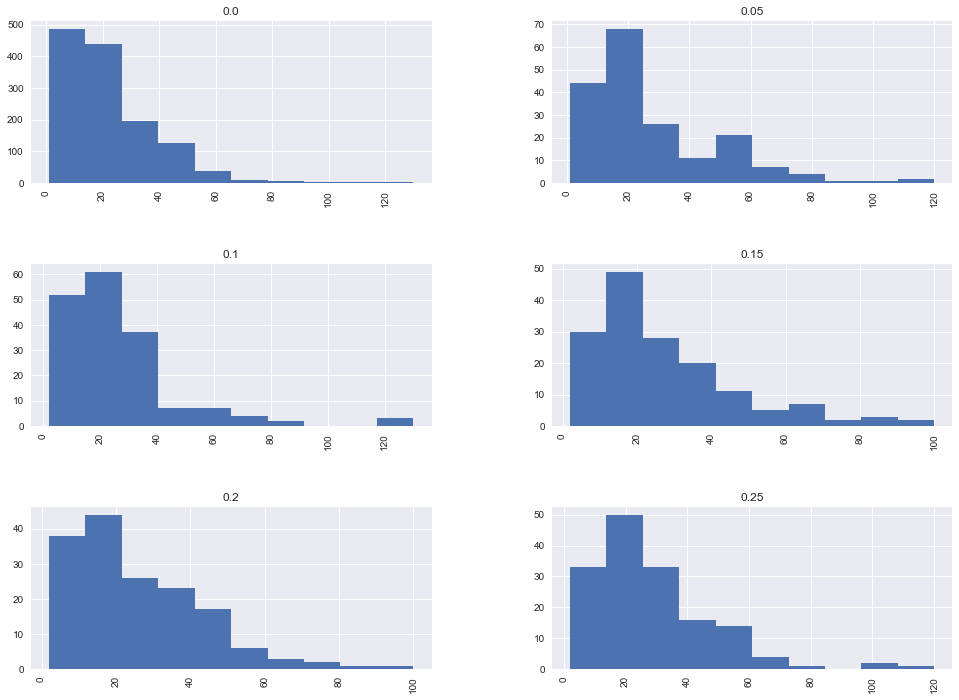

In [15]:
dataset.hist('Quantity', by='Discount', figsize=(16, 12));

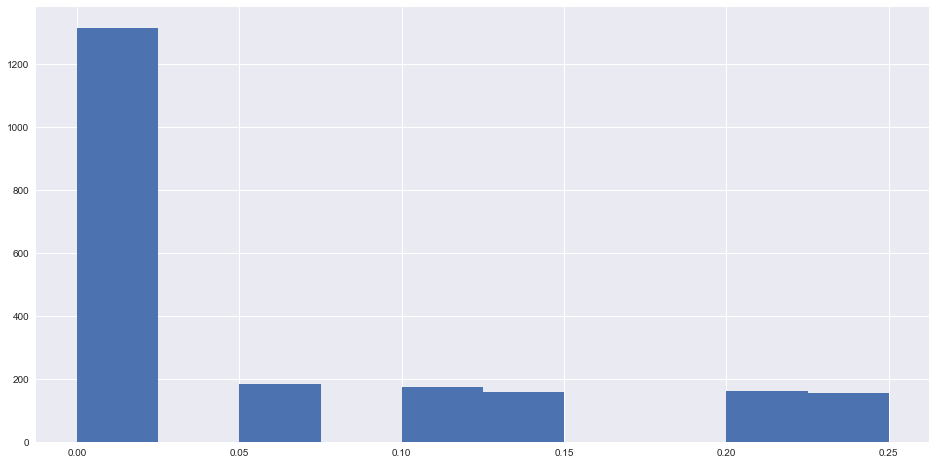

In [16]:
dataset.Discount.hist(figsize=(16, 8));

Note that most customers don't get a discount

<a id='section_id32'></a>

### 1-B. Hypothesis
_Remember our question: Does discount amount have a statistically significant effect on the quantity of products ordered_

$H_0$: Average number of products in an order is the same across all discount values ($H_0: \mu_1 = \mu_2 = \mu_3 =  ...  = \mu_i ...  = \mu_j$)

$H_a$: Average number of products in an order is different in at least two or more discount values ($H_a: \mu_i \neq \mu_j$)


Significance level $\alpha$ = 0.05

<a id='section_id33'></a>

### 1-C. Test Hypothesis

Because we are testing groups to see if there is a difference between them, we can use ANOVA (Analysis of Variance) as it is a way to find out if our survey results are significant. We can use "One-Way" test in our Analysis of Variance to test two groups in order to see if there’s a difference between them.

A "One-Way" ANOVA is used to compare two means from two independent (unrelated) groups using the F-distribution. The null hypothesis for the test is that the two means are equal. Therefore, a significant result means that the two means are unequal.

### Assumptions:

The results of a one-way ANOVA can be considered reliable as long as the following assumptions are met:

* The samples are **independent**.
* Each sample is from a **normally distributed** population.
* The population standard deviations of the groups are all equal, also known as **homoscedasticity**.


If data are ordinal, a non-parametric alternative to this test should be used such as Kruskal–Wallis one-way ANOVA. If the variances are not known to be equal, a generalization of 2-sample Welch's t-test can be used.


In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Quantity ~ Discount'
lm = ols(formula, dataset).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     35.49
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           2.99e-09
Time:                        10:32:00   Log-Likelihood:                -9351.1
No. Observations:                2147   AIC:                         1.871e+04
Df Residuals:                    2145   BIC:                         1.872e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2628      0.491     45.374      0.0

In [18]:
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                 sum_sq      df          F        PR(>F)
Discount   12621.238965     1.0  35.487951  2.991487e-09
Residual  762866.181622  2145.0        NaN           NaN


As we can see by the F value the discount is influential. And based on our alpha value of 0.05 which indicates a rejection of our null hypothesis.

---
The one-way ANOVA tests the null hypothesis that two or more groups have the **same** population mean.

In [19]:
from scipy import stats

fstat, pval = stats.f_oneway(dataset['Quantity'][dataset['Discount'] == 0.00],
                             dataset['Quantity'][dataset['Discount'] == 0.05],
                             dataset['Quantity'][dataset['Discount'] == 0.10],
                             dataset['Quantity'][dataset['Discount'] == 0.15],
                             dataset['Quantity'][dataset['Discount'] == 0.20],
                             dataset['Quantity'][dataset['Discount'] == 0.25])

print("fstat: {}, p-value: {}".format(fstat, pval))

fstat: 9.798709497651332, p-value: 2.840680781326738e-09


Checking if two or more groups have the **same** mean in order to pick the right approach to check our assumption.

In [20]:
d_list = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25]
for d in d_list:
    mu = np.mean(dataset['Quantity'][dataset['Discount'] == d])
    print(mu)

21.715261958997722
28.01081081081081
25.23699421965318
28.38216560509554
27.024844720496894
28.24025974025974


### Check Assumptions
Three groups have a similar mean, but **not** the same, we will use _scipy.stats.levene_ to tests the assumptions of the ANOVA model.

ASSUMPTION: HOMOGENEITY OF VARIANCE

The homogeneity of variance assumption should be checked for each level of the categorical variable. Therefore we can use the Levene’s test to test for equal variances between groups. The diagnostic output provided by statsmodels appears to only test it as the whole.

In [21]:
stat, pval = stats.levene(dataset['Quantity'][dataset['Discount'] == 0.00],
                          dataset['Quantity'][dataset['Discount'] == 0.05],
                          dataset['Quantity'][dataset['Discount'] == 0.10],
                          dataset['Quantity'][dataset['Discount'] == 0.15],
                          dataset['Quantity'][dataset['Discount'] == 0.20],
                          dataset['Quantity'][dataset['Discount'] == 0.25])

print("stat: {}, p-value: {}".format(stat, pval))

stat: 2.9943951679841643, p-value: 0.010664285577385134


The test shows us that the groups don't have equal variances.

ASSUMPTION: NORMALITY

The assumption of normality is tested on the residuals as a whole which is how the diagnostic information provided by statsmodels tests the residuals. We will perform here the Shapiro-Wilk test for normality.

In [22]:
tstat, pval = stats.shapiro(lm.resid_pearson)
print("tstat: {}, p-value: {}".format(tstat, pval))

tstat: 0.8587859869003296, p-value: 3.1726938660624616e-40


The result is significant which indicates that the **residuals are not normally distributed**. 

### Calculating Model Effect Size

The effect size tells us how much of an impact the experiment will have in the real world. There are a few different effect sizes one can use: eta squared ($\eta^2$), and omega squared ($\omega^2$). Omega squared is considered a better measure of effect size than eta squared because it is unbiased in it’s calculation.

_**Note 1:**_ for some reason R2 is called eta squared within the ANOVA framework. They are the same thing. R2 is a measure of how much variance is explained by the model and is calculated by taking the explained variance and dividing it by the total variance.

In [23]:
def anova_table(aov):
    """
    Calculate the effect sizes, as well as the mean squares and updates the table

    :aov: ANOVA table
    :return: updated ANOVA table
    """
    
    # calculate a mean squared
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    # calcualate eta squared
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    # calculate omega squared
    aov['omega_sq'] = (aov[:-1]['sum_sq'] - (aov[:-1]['df'] * aov['mean_sq'][-1])) / (sum(aov['sum_sq']) + aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    
    return aov

In [24]:
anova_table(table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
Discount,12621.238965,1.0,12621.238965,35.487951,2.991487e-09,0.016275,0.015809
Residual,762866.181622,2145.0,355.648570,NaN,NaN,NaN,NaN


The result shows that the **discount has only a small effect**.

### Post-Hoc Testing

Now we need to test which groups differ. Deciding which groups to compare should be theory driven.

Tukey's HSD Test compares more than 2 numerical datasets without increasing the probability of a false positive. Unlike ANOVA, Tukey tells us which datasets are significantly different. This method also controls for familywise error rate with a different method than Bonferroni, and is also considered conservative.

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(dataset['Quantity'], dataset['Discount'], 0.05)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    0.05   6.2955   2.0814 10.5097  True 
 0.0    0.1    3.5217  -0.8187  7.8622 False 
 0.0    0.15   6.6669   2.1352 11.1986  True 
 0.0    0.2    5.3096   0.8285  9.7907  True 
 0.0    0.25   6.525    1.954   11.096  True 
 0.05   0.1   -2.7738  -8.4504  2.9028 False 
 0.05   0.15   0.3714  -5.4528  6.1955 False 
 0.05   0.2    -0.986  -6.7708  4.7989 False 
 0.05   0.25   0.2294  -5.6253  6.0842 False 
 0.1    0.15   3.1452   -2.771  9.0613 False 
 0.1    0.2    1.7879  -4.0896  7.6653 False 
 0.1    0.25   3.0033   -2.943  8.9496 False 
 0.15   0.2   -1.3573  -7.3775  4.6628 False 
 0.15   0.25  -0.1419  -6.2292  5.9454 False 
 0.2    0.25   1.2154  -4.8343  7.2652 False 
---------------------------------------------


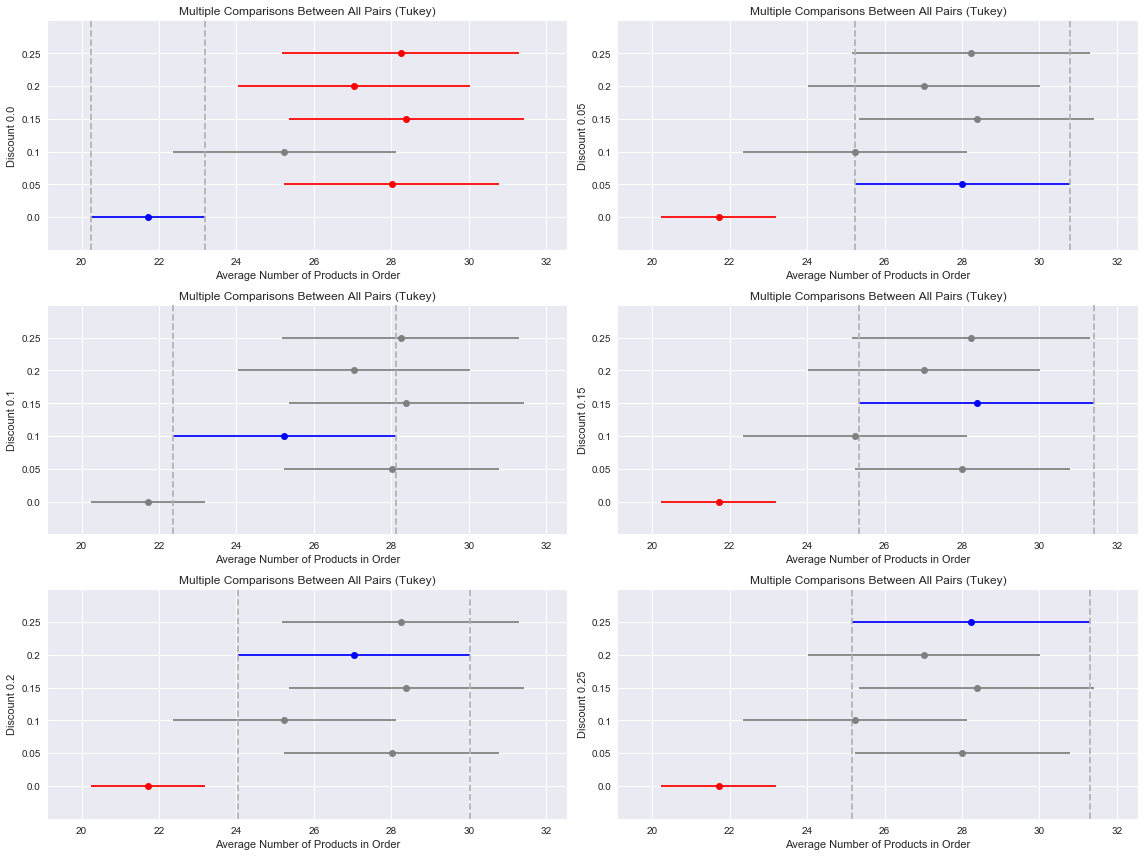

In [26]:
# Plot a universal confidence interval of each group mean

# Visiualize significant differences in a plot with one confidence interval per group instead of all 
# pairwise confidence intervals.

# comparison_name – if provided, plot_intervals will color code all groups that are significantly 
# different from the comparison_name red, and will color code insignificant groups gray. Otherwise, 
# all intervals will just be plotted in black.

cols = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25]

ncol = 2 # pick one dimension
nrow = 3 # make sure enough subplots
fig, axarr = plt.subplots(nrows=nrow, ncols=ncol, figsize=(24, 24)) # create the axes

for i in range(len(cols)): # go over a linear list of data
    ix = np.unravel_index(i, axarr.shape) # compute an appropriate index (1d or 2d)
    
    tukey_result.plot_simultaneous(comparison_name=cols[i],
                                   figsize=(16, 12),
                                   ylabel='Discount ' + str(cols[i]), 
                                   xlabel='Average Number of Products in Order',
                                   ax=axarr[ix]);

plt.tight_layout()
plt.show();

**Note:** the discount value 0.10 has an unwanted effect in the significant difference it seems.

In [27]:
stats.ttest_ind(dataset['Quantity'][dataset['Discount'] == 0.00], dataset['Quantity'][dataset['Discount'] == 0.05])

Ttest_indResult(statistic=-4.418557901446638, pvalue=1.064949724167325e-05)

<a id='section_id34'></a>
### 1-D. Conclusion

Recall our question: _Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?_

We opted to use a "One-Way" ANOVA test with an alpha value of 0.05 (5%) to calculate the effect of the discount levels on ordered products.
* A p-value of 2.991487e-09 shows us that there are **significant differences** between all discount values
* Based on the p-value I reject the null hypothesis and except the alternative hypothesis

---
<a id='section_id4'></a>

## 2. Question

Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

<a id='section_id41'></a>

###  2-A. Research

In [28]:
# print table names
print(inspector.get_table_names())

['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [29]:
get_columns_info('OrderDetail')

Table Name: OrderDetail

Name: Id 	 Type: VARCHAR(8000)
Name: OrderId 	 Type: INTEGER
Name: ProductId 	 Type: INTEGER
Name: UnitPrice 	 Type: DECIMAL
Name: Quantity 	 Type: INTEGER
Name: Discount 	 Type: FLOAT


In [30]:
get_columns_info('Product')

Table Name: Product

Name: Id 	 Type: INTEGER
Name: ProductName 	 Type: VARCHAR(8000)
Name: SupplierId 	 Type: INTEGER
Name: CategoryId 	 Type: INTEGER
Name: QuantityPerUnit 	 Type: VARCHAR(8000)
Name: UnitPrice 	 Type: DECIMAL
Name: UnitsInStock 	 Type: INTEGER
Name: UnitsOnOrder 	 Type: INTEGER
Name: ReorderLevel 	 Type: INTEGER
Name: Discontinued 	 Type: INTEGER


In [31]:
get_columns_info('Category')

Table Name: Category

Name: Id 	 Type: INTEGER
Name: CategoryName 	 Type: VARCHAR(8000)
Name: Description 	 Type: VARCHAR(8000)


In [32]:
dataset = pd.read_sql_query('''SELECT * FROM Category;''', engine)
dataset

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


#### Join 'OrderDetail', 'Product' and 'Category', at the same time assign meaningful names

In [33]:
Q2_df = pd.read_sql_query('''SELECT OrderDetail.Id orderdetail_id,
                                    OrderDetail.ProductId orderdetail_prodid,
                                    OrderDetail.Quantity orderdetail_quantity,
                                    OrderDetail.UnitPrice orderdetail_unitprice,
                                    OrderDetail.Discount orderdetail_discount,
                                    Product.Id product_id,
                                    Category.Id category_id, 
                                    Category.CategoryName category_name
                             FROM Category
                             JOIN Product ON Category.Id = Product.CategoryId
                             JOIN OrderDetail ON Product.Id = OrderDetail.ProductId;''', engine)


In [34]:
Q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
orderdetail_id           2155 non-null object
orderdetail_prodid       2155 non-null int64
orderdetail_quantity     2155 non-null int64
orderdetail_unitprice    2155 non-null float64
orderdetail_discount     2155 non-null float64
product_id               2155 non-null int64
category_id              2155 non-null int64
category_name            2155 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 134.8+ KB


In [35]:
Q2_df.head()

,orderdetail_id,orderdetail_prodid,orderdetail_quantity,orderdetail_unitprice,orderdetail_discount,product_id,category_id,category_name
0,10248/11,11,12,14.0,0.0,11,4,Dairy Products
1,10248/42,42,10,9.8,0.0,42,5,Grains/Cereals
2,10248/72,72,5,34.8,0.0,72,4,Dairy Products
3,10249/14,14,9,18.6,0.0,14,7,Produce
4,10249/51,51,40,42.4,0.0,51,7,Produce


In [36]:
Q2_df['discount_bool'] = np.where(Q2_df['orderdetail_discount'] > 0.0, 1, 0)
print(Q2_df['discount_bool'].value_counts())

0    1317
1     838
Name: discount_bool, dtype: int64


In [37]:
Q2_df['price'] = Q2_df['orderdetail_unitprice'] * (1 - Q2_df['orderdetail_discount'])

In [38]:
d_df = Q2_df['orderdetail_unitprice'].where(Q2_df['discount_bool'] == 1).dropna()
d_df.head()

6     42.4
7     16.8
8     16.8
9     15.6
11    64.8
Name: orderdetail_unitprice, dtype: float64

In [39]:
nd_df = Q2_df['orderdetail_unitprice'].where(Q2_df['discount_bool'] == 0).dropna()
nd_df.head()

0    14.0
1     9.8
2    34.8
3    18.6
4    42.4
Name: orderdetail_unitprice, dtype: float64

In [40]:
discount = d_df.tolist()
no_discount = nd_df.tolist()

<a id='section_id42'></a>

### 2-B. Hypothesis
(_Remember our question: Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?_)

$H_0$: $\mu_{\text{discounts}} \leq \mu_{\text{no discounts}}$, the mean quantity sold in orders with discounts is less or equal to the mean quantity sold of orders without discounts.

$H_a$: $\mu_{\text{discounts}} > \mu_{\text{no discounts}}$, the mean quantity sold in orders with discounts is higher than the mean quantity sold of orders without discounts.

Significance level $\alpha$ = 0.05

<a id='section_id43'></a>

### 2-C. Test Hypothesis

From our research we created two distinct groups of data. To determine whether the mean difference between the two unrelated groups is statistically significantly different from zero, we will use a **Two Sample T-Test**.

We will use the code from the course here, instead of ANOVA.

### Assumptions

* The **independent variable is categorical** with at least two levels (groups).
* The **dependent variable must be continuous** which is measured on an interval or ratio scale.
* The **dependent variable should not contain any significant outliers**.
* The **variances between the two groups are equal**.

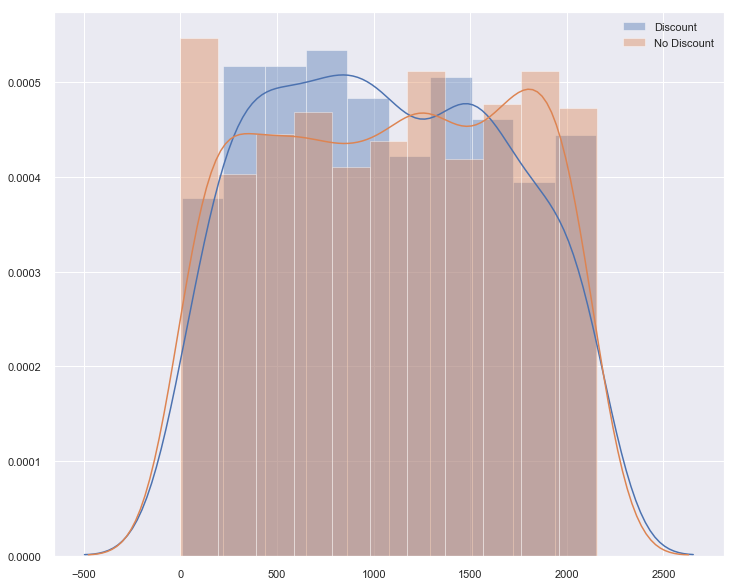

In [41]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(np.where(Q2_df['orderdetail_discount'] > 0.0), label='Discount') # Blue distribution
sns.distplot(np.where(Q2_df['orderdetail_discount'] == 0.0), label='No Discount') # Green distribution
plt.legend()
plt.show();

In [42]:
def variance(sample):
    sample_mean = np.mean(sample)
    return sum([(i - sample_mean)**2 for i in sample])

In [43]:
def sample_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = variance(sample1), variance(sample2)
    return (var_1 + var_2)/((n_1 + n_2)-2)

In [44]:
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    samp_var = sample_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(samp_var * ((1/n_e)+(1/n_c)))
    return num / denom

t_stat = twosample_tstatistic(no_discount, discount)
print("t-statistic: {}".format(t_stat))

t-statistic: -0.09165300766237709


Using the data we have so far, we can visualize the t-statistic and calculate the area under curve to calculate our p-value.

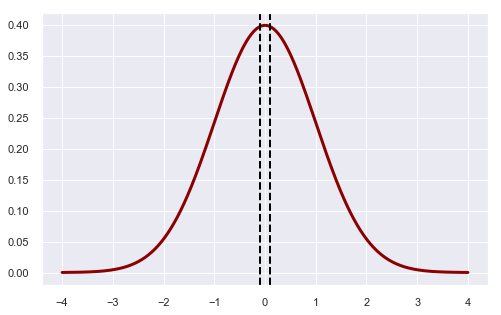

In [45]:
# Visualize p_value
def visualize_t(t_stat, n_control, n_experimental):

    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(t_stat, color='black', linestyle='--', lw=2)
    ax.axvline(-t_stat, color='black', linestyle='--', lw=2)

    plt.show();

num_d = len(discount)
num_nd = len(no_discount)
visualize_t(t_stat, num_d, num_nd)

In [46]:
pval = stats.t.sf(abs(t_stat), num_d + num_nd - 1) * 2
print('p-value: {}'.format(pval))

p-value: 0.9269822570742561


Calculates the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

In [47]:
stats.ttest_ind(discount, no_discount)

Ttest_indResult(statistic=0.09165300766237705, pvalue=0.9269822610324326)

The result is significant which indicates that the **residuals are not normally distributed**. 

### Calculating Model Effect Size

* Communicate **practical significance** of results. An effect might be statistically significant, but does it matter in practical scenarios ?

* Effect size calculation and interpretation allows you to draw **Meta-Analytical** conclusions. This allows you to group together a number of existing studies, calculate the meta-analytic effect size and get the best estimate of the tur effect size of the population. 

* Perform **Power Analysis** , which help determine the number of particicpants (sample size) that a study would require to achieve a certain probability of finding a true effect - if there is one. 


In [48]:
from statistics import mean, stdev
from math import sqrt

def cohens_d(x, y):
    """ 
    Calculate Cohens D as a measure of effect size. 
    """
    
    cohens_d = (mean(x) - mean(y)) / (sqrt((stdev(x)**2 + stdev(y)**2) / 2))
    return cohens_d
 

In [49]:
cohensD = cohens_d(discount, no_discount)
print(cohensD)

0.004045478541614375


The Cohens $d$ result shows us that we have a **very small effect size**.

<a id='section_id34'></a>

### 2-D. Conclusion

Recall our question: _Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?_

We opted to use a Two sample T-Test with an alpha value of 0.05 (5%) to calculate the effect of the discount levels on ordered products.

Based on the result from our test we **reject the null hypothesis and except the alternative hypothesis**.

---
<a id='section_id5'></a>

## 3. Question

Do customer spend more money on imported or domestic goods?

<a id='section_id51'></a>

### 3-A. Research

In [50]:
print(inspector.get_table_names())

['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [51]:
get_columns_info('Supplier')

Table Name: Supplier

Name: Id 	 Type: INTEGER
Name: CompanyName 	 Type: VARCHAR(8000)
Name: ContactName 	 Type: VARCHAR(8000)
Name: ContactTitle 	 Type: VARCHAR(8000)
Name: Address 	 Type: VARCHAR(8000)
Name: City 	 Type: VARCHAR(8000)
Name: Region 	 Type: VARCHAR(8000)
Name: PostalCode 	 Type: VARCHAR(8000)
Name: Country 	 Type: VARCHAR(8000)
Name: Phone 	 Type: VARCHAR(8000)
Name: Fax 	 Type: VARCHAR(8000)
Name: HomePage 	 Type: VARCHAR(8000)


In [52]:
get_columns_info('Customer')

Table Name: Customer

Name: Id 	 Type: VARCHAR(8000)
Name: CompanyName 	 Type: VARCHAR(8000)
Name: ContactName 	 Type: VARCHAR(8000)
Name: ContactTitle 	 Type: VARCHAR(8000)
Name: Address 	 Type: VARCHAR(8000)
Name: City 	 Type: VARCHAR(8000)
Name: Region 	 Type: VARCHAR(8000)
Name: PostalCode 	 Type: VARCHAR(8000)
Name: Country 	 Type: VARCHAR(8000)
Name: Phone 	 Type: VARCHAR(8000)
Name: Fax 	 Type: VARCHAR(8000)


In [53]:
get_columns_info('Order')

Table Name: Order

Name: Id 	 Type: INTEGER
Name: CustomerId 	 Type: VARCHAR(8000)
Name: EmployeeId 	 Type: INTEGER
Name: OrderDate 	 Type: VARCHAR(8000)
Name: RequiredDate 	 Type: VARCHAR(8000)
Name: ShippedDate 	 Type: VARCHAR(8000)
Name: ShipVia 	 Type: INTEGER
Name: Freight 	 Type: DECIMAL
Name: ShipName 	 Type: VARCHAR(8000)
Name: ShipAddress 	 Type: VARCHAR(8000)
Name: ShipCity 	 Type: VARCHAR(8000)
Name: ShipRegion 	 Type: VARCHAR(8000)
Name: ShipPostalCode 	 Type: VARCHAR(8000)
Name: ShipCountry 	 Type: VARCHAR(8000)


#### Join 'Customer', 'Order', 'OrderDetail', 'Product' and 'Supplier', at the same time assign meaningful names

In [54]:
Q3_df = pd.read_sql_query('''SELECT [Order].Id order_id,
                                    [Order].CustomerId customer_id,
                                    OrderDetail.ProductId product_id,
                                    OrderDetail.Quantity order_quantity,
                                    OrderDetail.UnitPrice unit_price,
                                    Customer.Country customer_country,
                                    Customer.Region customer_region,
                                    Supplier.Country supplier_country,
                                    Supplier.Region supplier_region
                             FROM Supplier
                             JOIN Product ON Supplier.Id = Product.SupplierId
                             JOIN OrderDetail ON Product.Id = OrderDetail.ProductId
                             JOIN [Order] ON OrderDetail.OrderId = [Order].Id
                             JOIN Customer ON [Order].CustomerId = Customer.Id;''', engine)


In [55]:
Q3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 9 columns):
order_id            2078 non-null int64
customer_id         2078 non-null object
product_id          2078 non-null int64
order_quantity      2078 non-null int64
unit_price          2078 non-null float64
customer_country    2078 non-null object
customer_region     2078 non-null object
supplier_country    2078 non-null object
supplier_region     2078 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 146.2+ KB


In [56]:
Q3_df.head()

,order_id,customer_id,product_id,order_quantity,unit_price,customer_country,customer_region,supplier_country,supplier_region
0,10248,VINET,11,12,14.0,France,Western Europe,Spain,Southern Europe
1,10248,VINET,42,10,9.8,France,Western Europe,Singapore,South-East Asia
2,10248,VINET,72,5,34.8,France,Western Europe,Italy,Southern Europe
3,10249,TOMSP,14,9,18.6,Germany,Western Europe,Japan,Eastern Asia
4,10249,TOMSP,51,40,42.4,Germany,Western Europe,Australia,NSW


In [57]:
Q3_df.customer_region.value_counts()

Western Europe     736
North America      427
South America      304
British Isles      190
Northern Europe    143
Southern Europe    137
Scandinavia         70
Central America     55
Eastern Europe      16
Name: customer_region, dtype: int64

In [58]:
Q3_df.supplier_region.value_counts()

Western Europe     430
North America      402
Southern Europe    220
British Isles      211
Scandinavia        166
Victoria           160
Northern Europe    150
Eastern Asia       116
NSW                 95
South-East Asia     78
South America       50
Name: supplier_region, dtype: int64

#### Technically, we should combine all of Europe regions into one because after all they are part of the EU.

In [59]:
mapping = {'Western Europe':'EU','Southern Europe':'EU','Northern Europe':'EU','Eastern Europe':'EU', 'North America':'North America', 'South America':'South America', 'British Isles':'British Isles', 'Scandinavia':'Scandinavia', 'Central America':'Central America', 'NSW':'NSW', 'Victoria':'Victoria', 'Eastern Asia':'Eastern Asia', 'South-East Asia':'South-East Asia'}
Q3_df['customer_region'] = Q3_df['customer_region'].map(mapping)
Q3_df['supplier_region'] = Q3_df['supplier_region'].map(mapping)
Q3_df.head()

,order_id,customer_id,product_id,order_quantity,unit_price,customer_country,customer_region,supplier_country,supplier_region
0,10248,VINET,11,12,14.0,France,EU,Spain,EU
1,10248,VINET,42,10,9.8,France,EU,Singapore,South-East Asia
2,10248,VINET,72,5,34.8,France,EU,Italy,EU
3,10249,TOMSP,14,9,18.6,Germany,EU,Japan,Eastern Asia
4,10249,TOMSP,51,40,42.4,Germany,EU,Australia,NSW


#### Creating "imported" feature

In [60]:
Q3_df['imported'] = np.where(Q3_df['customer_region'] == Q3_df['supplier_region'], 0, 1)
Q3_df['imported'].value_counts()

1    1560
0     518
Name: imported, dtype: int64

#### Define money spend per region

In [61]:
Q3_df['domestic_amount'] = np.where(Q3_df.imported == 0, (Q3_df.order_quantity * Q3_df.unit_price), 0.0)
Q3_df['foreign_amount'] = np.where(Q3_df.imported == 1, (Q3_df.order_quantity * Q3_df.unit_price), 0.0)
Q3_df.head()

,order_id,customer_id,product_id,order_quantity,unit_price,customer_country,customer_region,supplier_country,supplier_region,imported,domestic_amount,foreign_amount
0,10248,VINET,11,12,14.0,France,EU,Spain,EU,0,168.0,0.0
1,10248,VINET,42,10,9.8,France,EU,Singapore,South-East Asia,1,0.0,98.0
2,10248,VINET,72,5,34.8,France,EU,Italy,EU,0,174.0,0.0
3,10249,TOMSP,14,9,18.6,Germany,EU,Japan,Eastern Asia,1,0.0,167.4
4,10249,TOMSP,51,40,42.4,Germany,EU,Australia,NSW,1,0.0,1696.0


#### Create a simplified dataset for testing

In [62]:
dataset = Q3_df[['customer_id', 'domestic_amount', 'foreign_amount']]
dataset = dataset.groupby('customer_id').sum()

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, ALFKI to WOLZA
Data columns (total 2 columns):
domestic_amount    85 non-null float64
foreign_amount     85 non-null float64
dtypes: float64(2)
memory usage: 2.0+ KB


In [64]:
dataset.head()

,domestic_amount,foreign_amount
customer_id,,
ALFKI,2558.2,2038.00
ANATR,0.0,1402.95
AROUT,4335.0,9471.50
BERGS,13974.1,12994.05
BLAUS,1445.8,1794.00


In [65]:
d = dataset.domestic_amount.sum()
f = dataset.foreign_amount.sum()
print("domestic: {}, foreign: {}".format(d, f))

domestic: 407873.89, foreign: 903767.1499999999


<a id='section_id52'></a>

### 3-B. Hypothesis

_Remember our question: Do customer spend more money on imported or domestic goods?_

$H_0$: There is no difference in the amount spend between domestic and imported. ($\mu_1 = \mu_2$)

$H_a$: There is a difference in the amount spend between domestic and imported. ($\mu_1 \not= \mu_2$)

Significance level  𝛼  = 0.05

<a id='section_id53'></a>

### 3-C. Test  Hypothesis

Our hypothesis ask for a Two-Tail Test where we want to know if a parameter falls between (or outside) of a range of two values.

ASSUMPTONS:

1. Your **dependent variable** should be measured at the continuous level
2. Your **two independent variables** should each consist of **two or more categorical, independent groups**.
3. There should be **no significant outliers**.
4. Your **dependent variable** should be **approximately normally distributed for each combination of the groups of the two independent variables**.
5. There needs to be **homogeneity of variances for each combination of the groups of the two independent variables**.

##### Checking for outliers

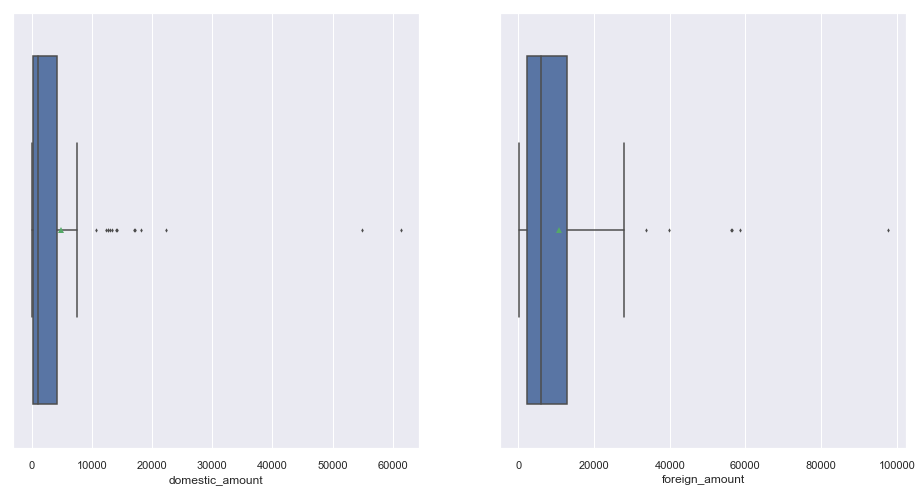

In [66]:
import math
vars = ['domestic_amount', 'foreign_amount']

# pick one dimension
ncol = 2
# make sure enough subplots
nrow = math.floor((len(vars) + ncol - 1) / ncol)
# create the axes
fig, axarr = plt.subplots(nrows=nrow, ncols=ncol, figsize=(16, 8))

# go over a linear list of data
for i in range(len(vars)):
    # compute an appropriate index (1d or 2d)
    ix = np.unravel_index(i, axarr.shape)

    feature_name = vars[i]

    g = sns.boxplot(y=feature_name, data=dataset, width=0.8, orient='h', 
                    showmeans=True, fliersize=3, ax=axarr[ix])


_NOTE_: There are some people who seem to like to shop a lot. 

One of the assumption is that there should be no significant outliers, we shall remove the most extremes.

In [67]:
low = .05
high = .95
quant_df = dataset.quantile([low, high])
print(quant_df)

      domestic_amount  foreign_amount
0.05            0.000          468.20
0.95        17187.288        38667.59


In [68]:
df_test = dataset.copy()
df_test = df_test.apply(lambda x: x[(x > quant_df.loc[low, x.name]) & 
                                    (x < quant_df.loc[high, x.name])], axis=0)

df_test.dropna(inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, ALFKI to WOLZA
Data columns (total 2 columns):
domestic_amount    60 non-null float64
foreign_amount     60 non-null float64
dtypes: float64(2)
memory usage: 1.4+ KB


##### Checking for homogeneity of variances

In [69]:
stats.levene(df_test['domestic_amount'], df_test['foreign_amount'])

LeveneResult(statistic=8.553676760881025, pvalue=0.004135926404914753)

Even though we removed our outliers, we still fail the homogeneity test. Therefore we will choose the Welch's t-test. Welch’s t-test is a nonparametric univariate test that tests for a significant difference between the mean of two unrelated groups. It is an alternative to the independent t-test when there is a violation in the assumption of equality of variances.

We can test the assumption of normality using the _**stats.shapiro()**_.

In [70]:
wtest, pval = stats.shapiro(dataset['domestic_amount'])
print('wtest: {}, p-value: {}'.format(wtest, pval))

wtest: 0.5034222602844238, p-value: 1.8021345930840406e-15


In [71]:
wtest, pval = stats.shapiro(dataset['foreign_amount'])
print('wtest: {}, p-value: {}'.format(wtest, pval))

wtest: 0.6163420677185059, p-value: 1.4305483880816539e-13


_NOTE:_ All of the variables of interest violate the assumption of normality.

We will select the Welch’s t-test to analyze the data because Levene’s test for homogeneity of variances indicated unequal variances between groups.

#### Welch's T-Test

To conduct a Welch’s t-test, one needs to use the stats.ttest_ind() method while passing “False” in the “equal_var=” argument.

In [72]:
stats.ttest_ind(dataset['domestic_amount'], dataset['foreign_amount'], equal_var = False)

Ttest_indResult(statistic=-2.9756718793666415, pvalue=0.0034331287209264576)

The p-value is not highly significant, but still significant enough one can reject the null hypothesis in support of the alternative.

Another piece of information we will need to report is the degrees of freedom (DoF). 

In [73]:
def welch_dof(x,y):
        dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
        print(f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")
        
welch_dof(dataset['domestic_amount'], dataset['foreign_amount'])

Welch-Satterthwaite Degrees of Freedom= 143.1099


In [74]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(dataset['domestic_amount'], dataset['foreign_amount'])


 Welch's t-test= -2.9757 
 p-value = 0.0034 
 Welch-Satterthwaite Degrees of Freedom= 143.1099


### Effect Size

Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable.

In [75]:
from statistics import mean, stdev
from math import sqrt

def cohens_d(x, y):
    """ 
    Calculate Cohens D as a measure of effect size. 
    """
    
    cohens_d = (mean(x) - mean(y)) / (sqrt((stdev(x)**2 + stdev(y)**2) / 2))
    print(cohens_d)
    

In [76]:
cohens_d(dataset['domestic_amount'], dataset['foreign_amount'])

-0.4564472299543739


The Cohens $d$ value shows us that we have a **medium effect size**.

<a id='section_id54'></a>

### 3-D. Conclusion

Recall our question: _Do customer spend more money on imported or domestic goods?_

We opt-ed at the end to run Welch's T-Test based on the given research results. 
* The amount spend on domestic goods (407873.89) vs foreign goods (903767.15)
* There is a **significant difference** between the amount of money spend on domestic vs foreign goods.
* The p-value (0.0034) is not significant, one can reject the null hypothesis in support of the alternative.

---
<a id='section_id6'></a>

## 4. Question

Would have been interesting to ask "Does customer demographic effect sale?", but the table 'CustomerDemographic' is empty. So, instead we will ask

Does gender matter in order volume? 

<a id='section_id61'></a>

## 4-A. Research

In [77]:
print(inspector.get_table_names())

['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [78]:
get_columns_info('Customer')

Table Name: Customer

Name: Id 	 Type: VARCHAR(8000)
Name: CompanyName 	 Type: VARCHAR(8000)
Name: ContactName 	 Type: VARCHAR(8000)
Name: ContactTitle 	 Type: VARCHAR(8000)
Name: Address 	 Type: VARCHAR(8000)
Name: City 	 Type: VARCHAR(8000)
Name: Region 	 Type: VARCHAR(8000)
Name: PostalCode 	 Type: VARCHAR(8000)
Name: Country 	 Type: VARCHAR(8000)
Name: Phone 	 Type: VARCHAR(8000)
Name: Fax 	 Type: VARCHAR(8000)


In [79]:
get_columns_info('OrderDetail')

Table Name: OrderDetail

Name: Id 	 Type: VARCHAR(8000)
Name: OrderId 	 Type: INTEGER
Name: ProductId 	 Type: INTEGER
Name: UnitPrice 	 Type: DECIMAL
Name: Quantity 	 Type: INTEGER
Name: Discount 	 Type: FLOAT


**JOIN 'Customer', 'Order', 'OrderDetail'**

In [80]:
Q4_df = pd.read_sql_query('''SELECT [Order].Id order_id,
                                    [Order].CustomerId customer_id,
                                    OrderDetail.ProductId product_id,
                                    OrderDetail.Quantity order_quantity,
                                    OrderDetail.UnitPrice unit_price,
                                    Customer.ContactName customer_name
                             FROM OrderDetail
                             JOIN [Order] ON OrderDetail.OrderId = [Order].Id
                             JOIN Customer ON [Order].CustomerId = Customer.Id;''', engine)


In [81]:
Q4_df.head()

,order_id,customer_id,product_id,order_quantity,unit_price,customer_name
0,10248,VINET,11,12,14.0,Paul Henriot
1,10248,VINET,42,10,9.8,Paul Henriot
2,10248,VINET,72,5,34.8,Paul Henriot
3,10249,TOMSP,14,9,18.6,Karin Josephs
4,10249,TOMSP,51,40,42.4,Karin Josephs


Because we don't have a field which would help us whether or not the contact is female or male we will create our own definition.

In [82]:
customer_names = list(Q4_df['customer_name'].unique())

In [83]:
print(customer_names)

['Paul Henriot', 'Karin Josephs', 'Mario Pontes', 'Mary Saveley', 'Pascale Cartrain', 'Yang Wang', 'Michael Holz', 'Paula Parente', 'Carlos Hernández', 'Roland Mendel', 'Francisco Chang', 'Henriette Pfalzheim', 'Bernardo Batista', 'Paula Wilson', 'Maria Larsson', 'Frédérique Citeaux', 'Pirkko Koskitalo', 'Peter Franken', 'Manuel Pereira', 'Karl Jablonski', 'Art Braunschweiger', 'Horst Kloss', 'Giovanni Rovelli', 'Miguel Angel Paolino', 'Alexander Feuer', 'Christina Berglund', 'Renate Messner', 'Alejandra Camino', 'Carlos González', 'Janete Limeira', 'Maurizio Moroni', 'Victoria Ashworth', 'Pedro Afonso', 'Anabela Domingues', 'Patricia McKenna', 'Rita Müller', 'José Pedro Freyre', 'Rene Phillips', 'Fran Wilson', 'Ana Trujillo', 'Liz Nixon', 'Helen Bennett', 'Guillermo Fernández', 'Philip Cramer', 'Jose Pavarotti', 'Martín Sommer', 'Lino Rodriguez', 'Laurence Lebihan', 'Jean Fresnière', 'Isabel de Castro', 'Jytte Petersen', 'Aria Cruz', 'Annette Roulet', 'Georg Pipps', 'Thomas Hardy', 'H

After extensive searching on the world wide web we have to define a female name list by hand. So the list is more or less subjective.

In [84]:
female_names = ['Karin Josephs', 'Mary Saveley', 'Yang Wang', 'Paula Parente', 'Henriette Pfalzheim', 
                'Paula Wilson', 'Maria Larsson', 'Pirkko Koskitalo', 'Christina Berglund', 'Renate Messner', 
                'Alejandra Camino', 'Janete Limeira', 'Victoria Ashworth', 'Anabela Domingues', 'Patricia McKenna', 
                'Rita Müller', 'Fran Wilson', 'Ana Trujillo', 'Liz Nixon', 'Helen Bennett', 'Isabel de Castro', 
                'Jytte Petersen', 'Aria Cruz', 'Annette Roulet', 'Ann Devon', 'Elizabeth Lincoln', 'Elizabeth Brown', 
                'Hanna Moos', 'Catherine Dewey', 'Liu Wong', 'Maria Anders', 'Carine Schmitt']

In [85]:
Q4_df['gender'] = np.where(Q4_df['customer_name'].isin(female_names), 'female', 'male')
Q4_df.head()

,order_id,customer_id,product_id,order_quantity,unit_price,customer_name,gender
0,10248,VINET,11,12,14.0,Paul Henriot,male
1,10248,VINET,42,10,9.8,Paul Henriot,male
2,10248,VINET,72,5,34.8,Paul Henriot,male
3,10249,TOMSP,14,9,18.6,Karin Josephs,female
4,10249,TOMSP,51,40,42.4,Karin Josephs,female


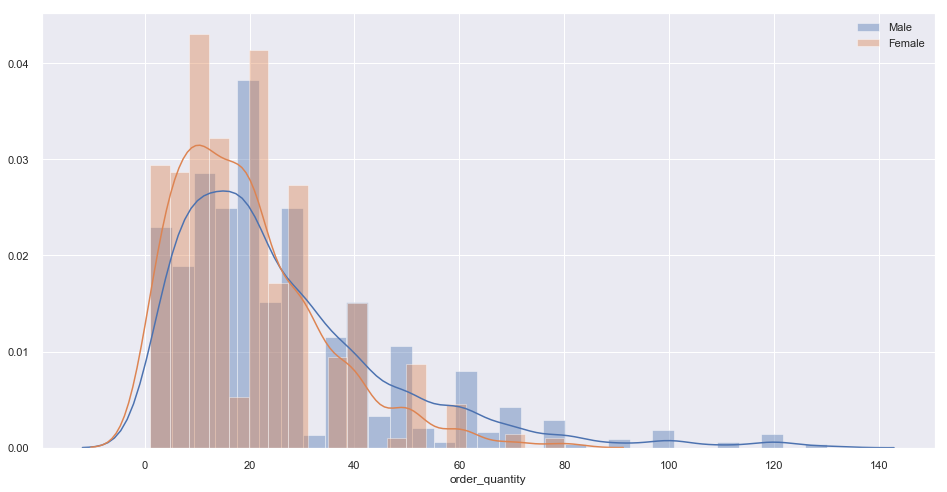

In [86]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(16, 8)})
sns.distplot(Q4_df['order_quantity'][Q4_df['gender'] == 'male'], label='Male'); # Blue distribution
sns.distplot(Q4_df['order_quantity'][Q4_df['gender'] == 'female'], label='Female'); # Green distribution
plt.legend()
plt.show();

<a id='section_id62'></a>

## 4-B. Hypothesis

Remember our question: _Does gender matter in order volume?_

$H_0$: $\mu_f = \mu_m$, the mean of female customers is equal to the mean of male customers.

$H_a$: $\mu_f \not= \mu_m$, the mean of female customers is NOT equal to the mean of male customers.

Significance level $\alpha = 0.05$

<a id='section_id63'></a>

## 4-C. Test Hypothesis

##### Test Approach

A two-way ANOVA test is a statistical test used to determine the effect of two nominal predictor variables on a continuous outcome variable. A two-way ANOVA tests the effect of two independent variables on a dependent variable. A two-way ANOVA test analyzes the effect of the independent variables on the expected outcome along with their relationship to the outcome itself. 

Assumptions:
    
1. Your **dependent variable** should be measured at the continuous level
2. Your **two independent variables** should each consist of **two or more categorical, independent groups**.
3. There should be **no significant outliers**.
4. Your **dependent variable** should be **approximately normally distributed for each combination of the groups of the two independent variables**.
5. There needs to be **homogeneity of variances for each combination of the groups of the two independent variables**.

In [87]:
formula = 'order_quantity ~ C(gender)'
model = ols(formula, Q4_df).fit()
table = sm.stats.anova_lm(model, typ=2)

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 1, 2076) =  59.879, p =  0.0000


In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         order_quantity   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     59.88
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           1.56e-14
Time:                        10:32:05   Log-Likelihood:                -9053.5
No. Observations:                2078   AIC:                         1.811e+04
Df Residuals:                    2076   BIC:                         1.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.6983      0.686     28.736      0.000      18.354      21.043
C(gender)[T.male]     6.6580      0.860      7.738      0.000       4.971       8.345
==============================================================================
Omnibus:                      718.234   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2574.061
Skew:                           1.699   Prob(JB):                         0.00
Kurtosis:                       7.264   Cond. No.                         3.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
anova_table(table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(gender),21356.705700,1.0,21356.705700,59.879226,1.562574e-14,0.028035,0.027554
Residual,740432.432413,2076.0,356.663021,NaN,NaN,NaN,NaN


### Post-hoc Testing

There are a few different methods of post-hoc testing to find a difference between groups of factors. I will show how to use Tukey’s HSD. We have to test for difference for each factor separately.

The Tukey HSD post-hoc comparison test controls for type I error and maintains the familywise error rate at 0.05 (FWER= 0.05 top of the table). The group1 and group2 columns are the groups being compared, the meandiff column is the difference in means of the two groups being calculated as group2 – group1, the lower/upper columns are the lower/upper boundaries of the 95% confidence interval, and the reject column states whether or not the null hypothesis should be rejected.

In [90]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(Q4_df['order_quantity'], Q4_df['gender'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
female  male   6.658   4.9707 8.3454  True 
-------------------------------------------


In [91]:
tstat, pval = stats.ttest_ind(Q4_df['order_quantity'][Q4_df['gender'] == 'female'], Q4_df['order_quantity'][Q4_df['gender'] == 'male'])
print('Ttest_indResult(statistic = {}, pvalue = {}'.format(tstat, pval))

Ttest_indResult(statistic = -7.738166843778007, pvalue = 1.562573840677636e-14


<a id='section_id64'></a>

## 4-D. Conclusion

We run through a two-way ANOVA test with an $\alpha = 0.05$ to find if gender has an effect on order volume:

* There is a statistically significant different between the mean order_quantity for female and male.
* Based on our findings we **reject the null hypothesis in support of the alternative**.